In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("fraudtest.csv")

In [4]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])

In [5]:
# amt column is removed because of zero variance 
df.drop(columns=['Unnamed: 0','first', 'last', 'street', 'city','trans_date_trans_time','trans_num','dob','amt'],inplace=True)
df.dtypes

cc_num          int64
merchant       object
category       object
gender         object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [6]:
encoder = LabelEncoder()
df["merchant"] = encoder.fit_transform(df["merchant"])
df["category"] = encoder.fit_transform(df["category"])
df["gender"] = encoder.fit_transform(df["gender"])
df["job"] = encoder.fit_transform(df["job"])
df["state"] = encoder.fit_transform(df["state"])

In [7]:
df.head()

,cc_num,merchant,category,gender,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,319,10,1,39,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,3573030041201292,591,10,0,43,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,3598215285024754,611,5,0,33,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,3591919803438423,222,9,1,8,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,3526826139003047,292,13,1,21,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']

In [11]:
clf = GridSearchCV(LogisticRegression(solver='liblinear', multi_class='auto'), {
    'C': [1,10,20],
}, cv=5, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
df1 = pd.DataFrame(clf.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.531791,0.108694,0.008979,0.001484,1,{'C': 1},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1
1,0.487376,0.043014,0.006913,0.000357,10,{'C': 10},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1
2,0.492623,0.040183,0.006675,0.000039,20,{'C': 20},0.99614,0.99614,0.99614,0.99614,0.99614,0.99614,1.389150e-08,1


In [10]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (555719, 13)
Shape of y: (555719,)


In [34]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [1,50,100],
}

rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=5, return_train_score=False, n_iter=2)

rs.fit(X, y)

df2 = pd.DataFrame(rs.cv_results_)[['param_n_estimators', 'mean_test_score']]


In [35]:
df2

,param_n_estimators,mean_test_score
0,1,0.898546
1,100,0.981322


In [32]:
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0), {
            'criterion': ['gini', 'entropy']
,
}, cv=10, return_train_score=False)
clf.fit(X, y)
clf.cv_results_
df3 = pd.DataFrame(clf.cv_results_)
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,6.058480,0.207704,0.009262,0.003137,gini,{'criterion': 'gini'},0.004661,0.992964,0.967142,0.922821,0.749046,0.157813,0.034100,0.037753,0.088282,0.996059,0.495064,0.437100,2
1,5.343532,0.167215,0.010622,0.003664,entropy,{'criterion': 'entropy'},0.923631,0.993900,0.988879,0.908209,0.682340,0.612917,0.723602,0.664831,0.026758,0.996149,0.752122,0.280477,1


In [39]:
plt.rcParams["figure.figsize"] = (20,15)


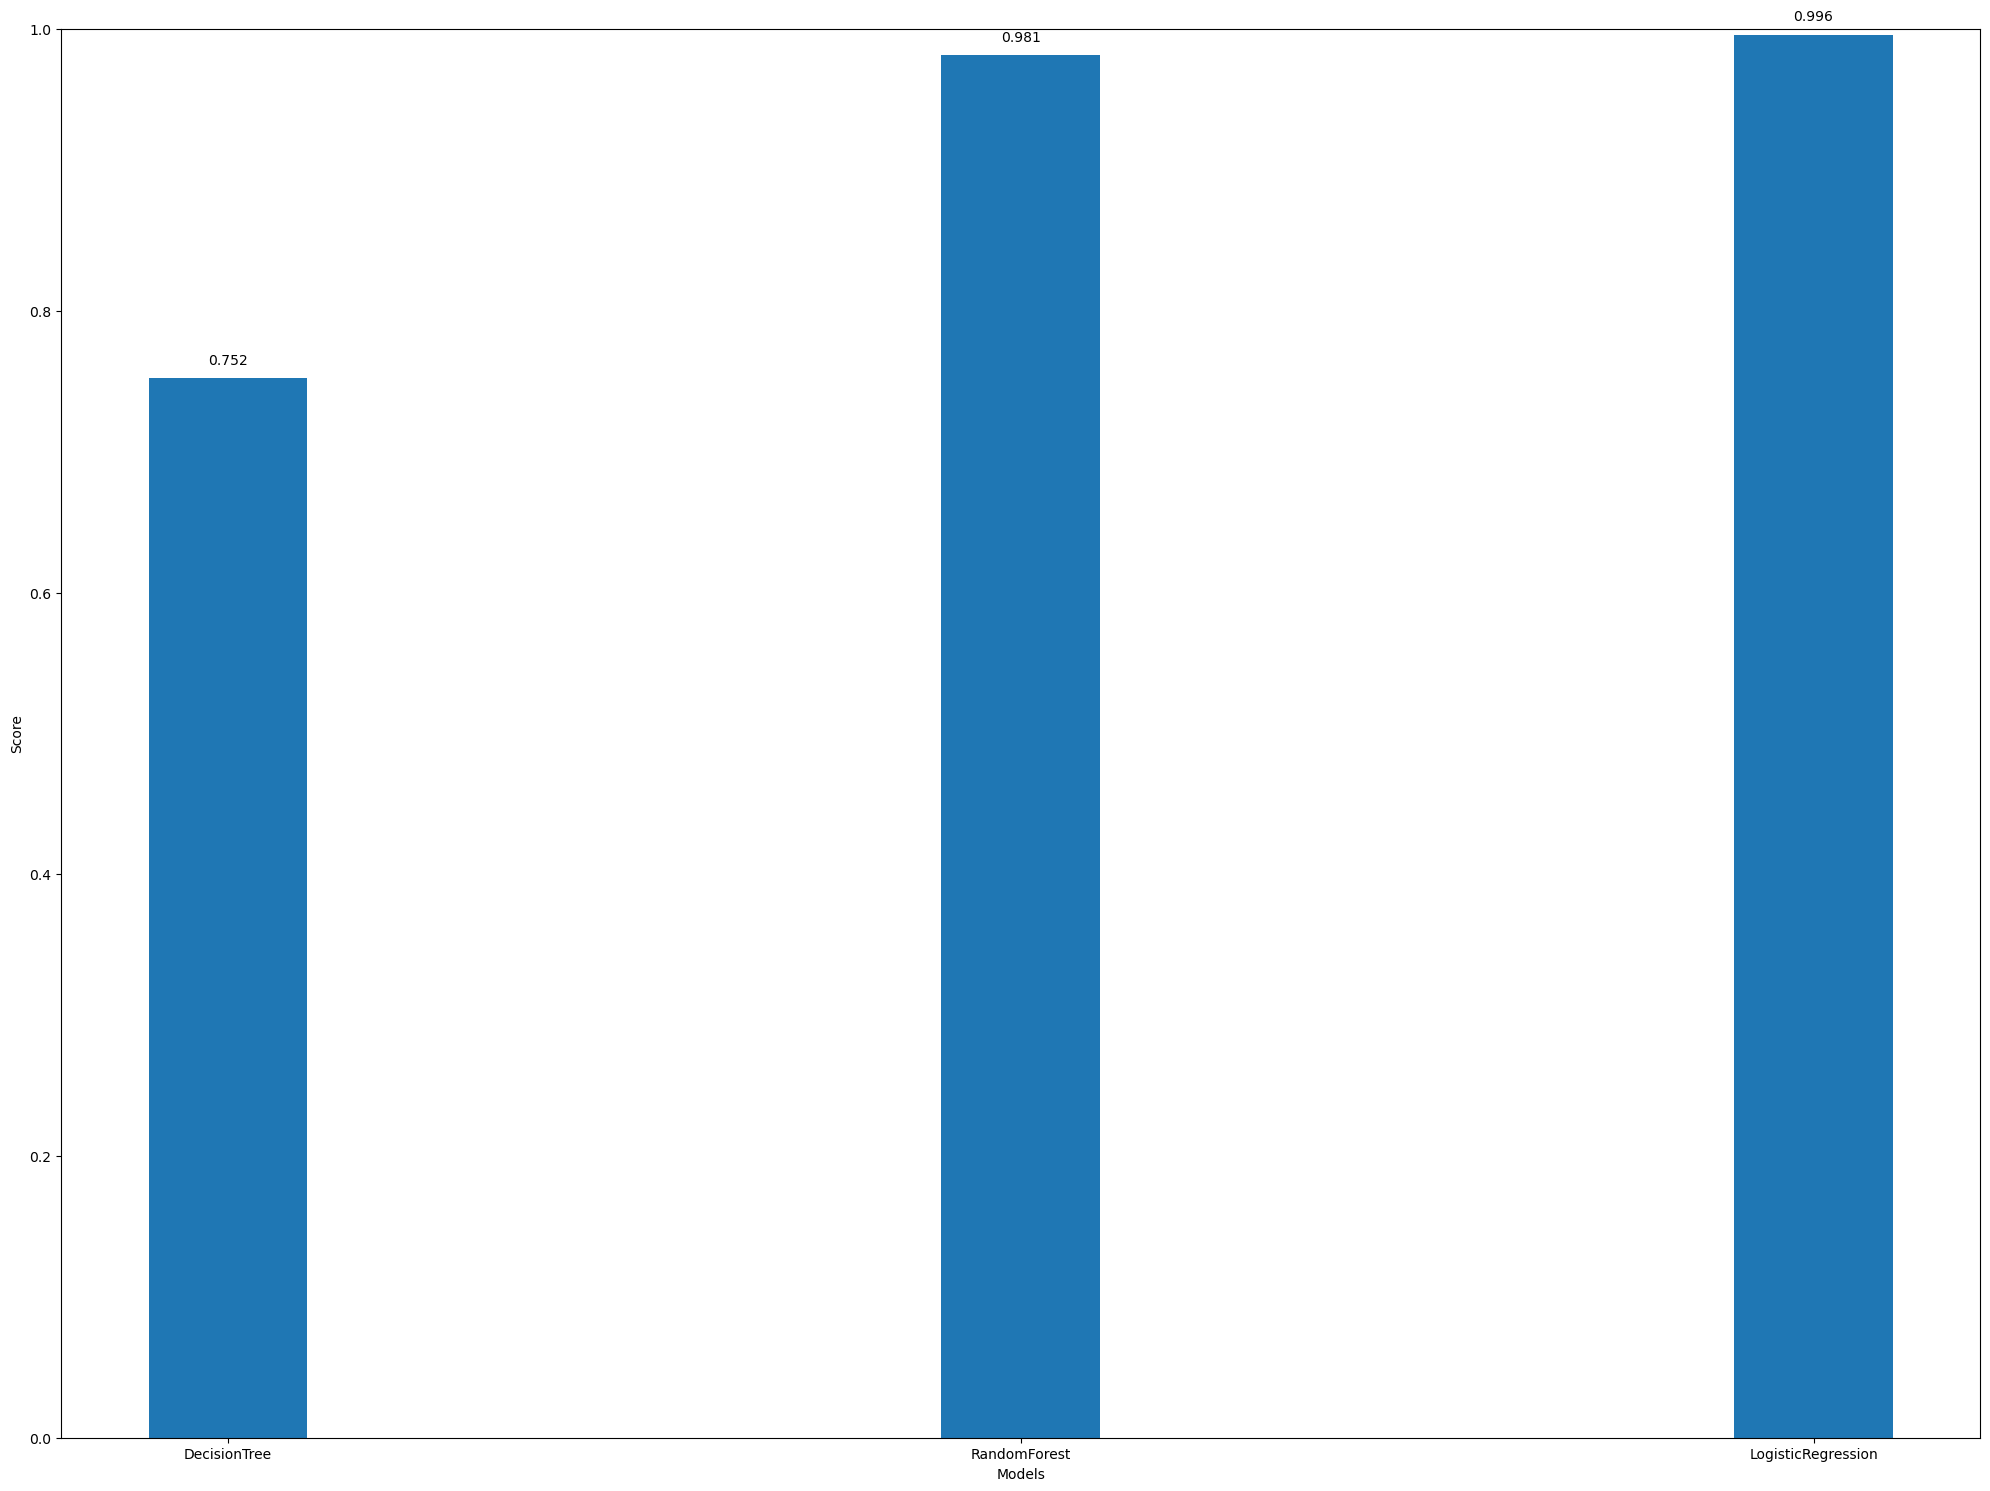

In [40]:
import matplotlib.pyplot as plt
import numpy as np

Models = ['DecisionTree', 'RandomForest', 'LogisticRegression']
y = [0.752122, 0.981322, 0.99614]

fig, ax = plt.subplots()

x = np.arange(len(Models))

ax.bar(x, y, width=0.2)
ax.set_xticks(x)
ax.set_xticklabels(Models)
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.0)  # Adjust the y-axis limit based on your data range

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.01, s=str(round(value, 3)), ha='center')

plt.tight_layout()
plt.show()


Logistic Regression is Better we can increase Score by Random Forest But computation is heavy 